In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [259]:
df_2004 =pd.read_csv('data/건강검진정보_2004.CSV',encoding='euc-kr')
df_2004.head(3)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2004,965971,2,1,43,140,40,0.4,0.5,1.0,...,10,1.0,Y,Y,N,N,N,NaN,N,2015-12-20
1,2004,966242,2,1,48,145,35,1.0,0.8,1.0,...,10,1.0,N,Y,N,N,N,NaN,N,2015-12-20
2,2004,26203,2,1,11,145,40,0.6,0.7,1.0,...,13,1.0,N,Y,N,N,N,NaN,N,2015-12-20


In [260]:
df_2004=df_2004[['연령대코드(5세단위)','성별코드','음주여부']]
df_2004=df_2004.fillna(0)
df_2004.isna().sum()

연령대코드(5세단위)    0
성별코드           0
음주여부           0
dtype: int64

In [261]:
df_2009 =pd.read_csv('data/건강검진정보_2009(수정).csv',encoding='euc-kr')
df_2009.head(3)
df_2009['음주여부'].isna().sum()

0

In [262]:
df_2014 =pd.read_csv('data/건강검진정보_2014.CSV',encoding='euc-kr')
df_2014.head(3)
df_2014['음주여부'].isna().sum()

984

In [263]:
df_2014=df_2014[['연령대코드(5세단위)','성별코드','음주여부']]
df_2014=df_2014.fillna(0)
df_2014.isna().sum()

연령대코드(5세단위)    0
성별코드           0
음주여부           0
dtype: int64

In [264]:
df_2019 =pd.read_csv('data/건강검진정보_2019(수정).csv',encoding='euc-kr')
df_2019=df_2019.iloc[:1000000,:]
df_2019.head(3)
df_2019['음주여부'].isna().sum()

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_5988\3247359584.py:1: DtypeWarning: Columns (29,30,31,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 =pd.read_csv('data/건강검진정보_2019(수정).csv',encoding='euc-kr')


355339

In [265]:
df_2019=df_2019[['연령대 코드(5세단위)','성별코드','음주여부']]
df_2019=df_2019.fillna(0)
df_2019.isna().sum()

연령대 코드(5세단위)    0
성별코드            0
음주여부            0
dtype: int64

In [266]:
a=pd.DataFrame(df_2019.groupby(['연령대 코드(5세단위)', '성별코드'])['음주여부'].count())
a


음주여부
연령대 코드(5세단위) 성별코드       
5.0          1.0   14107
             2.0   18678
6.0          1.0   37218
             2.0   33025
7.0          1.0   47842
             2.0   34137
8.0          1.0   52894
             2.0   32147
9.0          1.0   64618
             2.0   54553
10.0         1.0   59559
             2.0   50208
11.0         1.0   64075
             2.0   64607
12.0         1.0   52185
             2.0   50991
13.0         1.0   53950
             2.0   58661
14.0         1.0   26624
             2.0   27222
15.0         1.0   25387
             2.0   28326
16.0         1.0   11696
             2.0   14657
17.0         1.0    7838
             2.0   10435
18.0         1.0    1429
             2.0    2931

In [267]:
total=pd.DataFrame(df_2019[df_2019.음주여부 ==1].groupby(['연령대 코드(5세단위)', '성별코드'])['음주여부'].count())
total

음주여부
연령대 코드(5세단위) 성별코드       
5.0          1.0   11452
             2.0   15333
6.0          1.0   31806
             2.0   26899
7.0          1.0   41101
             2.0   25533
8.0          1.0   45376
             2.0   23005
9.0          1.0   54664
             2.0   37125
10.0         1.0   49478
             2.0   30723
11.0         1.0   51123
             2.0   33402
12.0         1.0   39533
             2.0   20997
13.0         1.0   37654
             2.0   18061
14.0         1.0   16714
             2.0    6020
15.0         1.0   13655
             2.0    4234
16.0         1.0    5238
             2.0    1413
17.0         1.0    2832
             2.0     772
18.0         1.0     358
             2.0     143

In [268]:
# 2019년 연령별/성별 음주율
drink=(total/a*100).round(1)
drink.reset_index(inplace=True)

In [269]:
drink.set_index('연령대 코드(5세단위)',inplace=True)
drink

,성별코드,음주여부
연령대 코드(5세단위),,
5.0,1.0,81.2
5.0,2.0,82.1
6.0,1.0,85.5
6.0,2.0,81.5
7.0,1.0,85.9
7.0,2.0,74.8
8.0,1.0,85.8
8.0,2.0,71.6
9.0,1.0,84.6


In [271]:

drink_1=drink[drink.성별코드 == 1]
drink_2=drink[drink.성별코드 == 2]


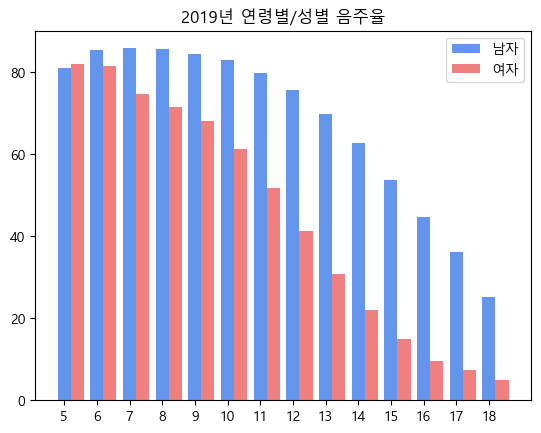

In [276]:
plt.bar(drink_1.index, drink_1.음주여부, label='남자', color='cornflowerblue',width=0.4)
plt.bar(drink_1.index+0.4, drink_2.음주여부,  label='여자', color='lightcoral',width=0.4)
plt.xticks(np.arange(5, 19, 1))
plt.legend()
plt.title('2019년 연령별/성별 음주율')
plt.show()

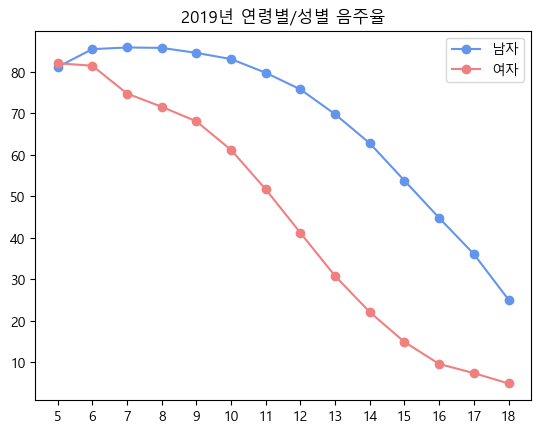

In [277]:
plt.plot(drink_1.index, drink_1.음주여부, marker='o', label='남자', color='cornflowerblue')
plt.plot(drink_1.index, drink_2.음주여부, marker='o', label='여자', color='lightcoral')
plt.xticks(np.arange(5, 19, 1))
plt.legend()
plt.title('2019년 연령별/성별 음주율')
plt.show()

In [272]:
drink_3=drink.reset_index().pivot(index='연령대 코드(5세단위)',columns='성별코드',values='음주여부')

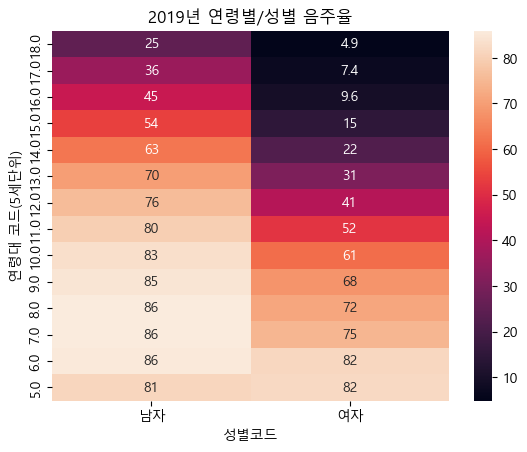

In [279]:
import seaborn as sns
sns.heatmap(drink_3.sort_index(ascending=False),annot=True,xticklabels=['남자','여자'])
plt.title('2019년 연령별/성별 음주율');

In [ ]:
a=pd.DataFrame(df_2004.groupby(['연령대코드(5세단위)', '성별코드'])['음주여부'].count())
total=pd.DataFrame(df_2004[df_2004.음주여부 =='Y'].groupby(['연령대코드(5세단위)', '성별코드'])['음주여부'].count())
df_drink_2004=(total/a*100).round(1)
df_drink_2004=df_drink_2004.groupby(['성별코드'])['음주여부'].mean().round(1)
df_drink_2004

성별코드
1    55.1
2    21.6
Name: 음주여부, dtype: float64

In [ ]:
a=pd.DataFrame(df_2009.groupby(['연령대 코드(5세 단위)', '성별코드'])['음주여부'].count())
total=pd.DataFrame(df_2009[df_2009.음주여부 =='Y'].groupby(['연령대 코드(5세 단위)', '성별코드'])['음주여부'].count())
df_drink_2009=(total/a*100).round(3)
df_drink_2009=df_drink_2009.groupby(['성별코드'])['음주여부'].mean().round(1)
df_drink_2009

성별코드
1    36.2
2    29.4
Name: 음주여부, dtype: float64

In [ ]:
a=pd.DataFrame(df_2014.groupby(['연령대코드(5세단위)', '성별코드'])['음주여부'].count())
total=pd.DataFrame(df_2014[df_2014.음주여부 =='Y'].groupby(['연령대코드(5세단위)', '성별코드'])['음주여부'].count())
df_drink_2014=(total/a*100).round(3)
df_drink_2014=df_drink_2014.groupby(['성별코드'])['음주여부'].mean().round(1)
df_drink_2014

성별코드
1    41.3
2    74.7
Name: 음주여부, dtype: float64

In [ ]:
a=pd.DataFrame(df_2019.groupby(['연령대 코드(5세단위)', '성별코드'])['음주여부'].count())
total=pd.DataFrame(df_2019[df_2019.음주여부 ==1].groupby(['연령대 코드(5세단위)', '성별코드'])['음주여부'].count())
df_drink_2019=(total/a*100).round(3)
df_drink_2019=df_drink_2019.groupby(['성별코드'])['음주여부'].mean().round(1)
df_drink_2019

성별코드
1.0    68.1
2.0    44.4
Name: 음주여부, dtype: float64

In [ ]:
df_last = pd.concat([df_drink_2004, df_drink_2009,df_drink_2014,df_drink_2019], axis=1)
df_last.columns = ['2004', '2009','2014','2019']
df_last.index=['남자','여자']
df_last

,2004,2009,2014,2019
남자,55.1,36.2,41.3,68.1
여자,21.6,29.4,74.7,44.4


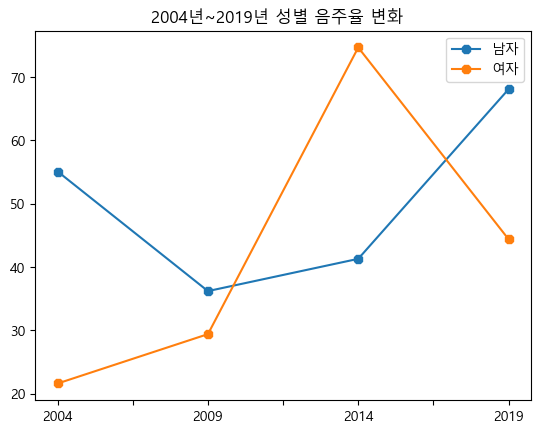

In [ ]:
df_last.T.plot(marker='8')
plt.title('2004년~2019년 성별 음주율 변화  ')
plt.show()